In [3]:

import numpy as np
import matplotlib.pyplot as plt
from ctapipe.io import EventSource
from astropy.table import Table, vstack
from ctapipe.visualization import CameraDisplay
import pandas as pd
import glob
from astropy import units as u


# File for the subarray description use
filename = '/Users/vdk/muons2024/lapalma_simulations/simtel/zenith10/run101_muon.simtel.gz'
source = EventSource(filename, max_events = 5000)
event_iterator = iter(source)
        
colors = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#e377c2',  # raspberry yogurt pink
    '#8c564b',  # chestnut brown
    'k'
]

## Uploading of arrays with waveforms

In [4]:
tuned_sim_files = glob.glob('/Users/vdk/muons2024/data/dc_to_pe_comparison/tuned_simulations/*')
data_files = glob.glob('/Users/vdk/muons2024/data/dc_to_pe_comparison/17043_subrun20/*')
sim_files = glob.glob('/Users/vdk/muons2024/data/dc_to_pe_comparison/simulations/*')
double_tuned_files = glob.glob('/Users/vdk/muons2024/data/dc_to_pe_comparison/triple_tuned_sim/*')

data_waveforms = []
tune_sim_waveforms = []
double_tuned_waveforms = []
sim_waveforms = []

for file_name in tuned_sim_files:
    tune_sim_waveforms.append(
        np.loadtxt(file_name)
    )

for file_name in sim_files:
    sim_waveforms.append(
        np.loadtxt(file_name)
    )

for file_name in data_files:
    data_waveforms.append(
        np.loadtxt(file_name)
    )
    
for file_name in double_tuned_files:
    double_tuned_waveforms.append(
        np.loadtxt(file_name)
    )


#### Creation of arrays with variances for each time bin, choosing the pixels where charge amplitude is less then some threshold value in p.e., in order to choose only pixels without signal

Text(0.5, 1.0, 'Mean of the variance for pixels with charge  < 1.3 p.e, just after dc_to_pe conversion')

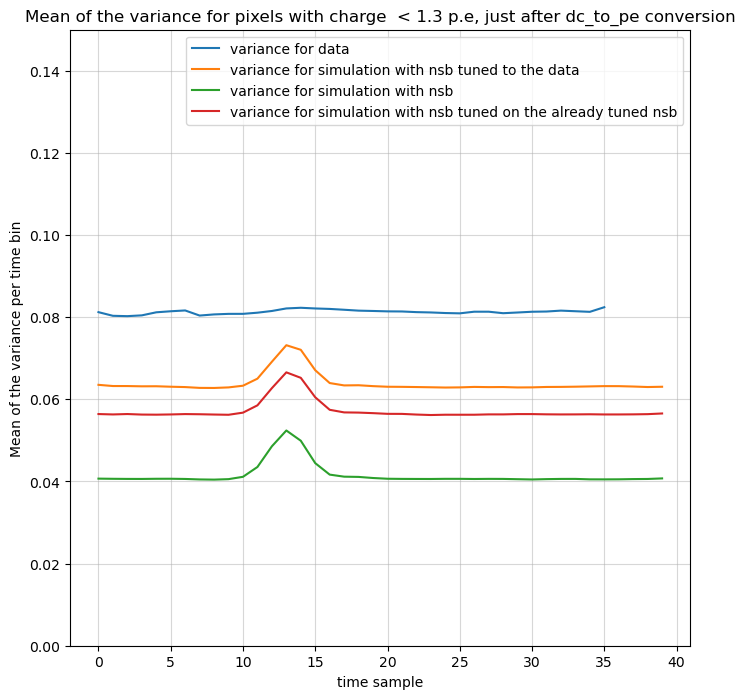

In [6]:
cut_threshold = 1.3

thresholds = np.array([cut_threshold for i in range(40)]) 
tuned_sim_row_variances = []
for waveform in tune_sim_waveforms:
    condition = np.all(waveform < thresholds, axis=1)
    tuned_sim_row_variances.append(np.var(waveform[condition], axis=0))
    
    
thresholds = np.array([cut_threshold for i in range(36)]) 
data_row_variances = []
for waveform in data_waveforms:
    condition = np.all(waveform < thresholds, axis=1)
    data_row_variances.append(np.var(waveform[condition], axis=0))

  
thresholds = np.array([cut_threshold for i in range(40)]) 
sim_row_variances = []
for waveform in sim_waveforms:
    condition = np.all(waveform < thresholds, axis=1)
    sim_row_variances.append(np.var(waveform[condition], axis=0))

double_tuned_sim_row_variances = []
for waveform in double_tuned_waveforms:
    condition = np.all(waveform < thresholds, axis=1)
    double_tuned_sim_row_variances.append(np.var(waveform[condition], axis=0))

mean_var_tuned_sim = np.mean(np.array(tuned_sim_row_variances), axis = 0)
mean_var_double_tuned_sim = np.mean(np.array(double_tuned_sim_row_variances), axis = 0)
mean_var_sim = np.mean(np.array(sim_row_variances), axis = 0)
mean_var_data = np.mean(np.array(data_row_variances), axis = 0)

plt.figure(figsize=(8,8))
plt.plot(mean_var_data, label = "variance for data")
plt.plot(mean_var_tuned_sim, label = "variance for simulation with nsb tuned to the data")
plt.plot(mean_var_sim, label = "variance for simulation with nsb")
plt.plot(mean_var_double_tuned_sim, label = "variance for simulation with nsb tuned on the already tuned nsb")

plt.grid(alpha=0.5)


plt.ylim(0.0,0.15)
plt.xlabel("time sample")
plt.ylabel("Mean of the variance per time bin")
plt.legend()
plt.title(f"Mean of the variance for pixels with charge  < {cut_threshold} p.e, just after dc_to_pe conversion")
#plt.savefig('/Users/vdk/muons2024/images/PlanPaper/Variance_1000_events_cut<1.3pe.pdf', dpi = 200)

### Histogram for all variances

Mean value of the variance for data 0.081 with std = 0.007
Mean value of the variance for simulations 0.042 with std = 0.004
Mean value of the variance for tuned simulations 0.064 with std = 0.004
Mean value of the variance for tuned simulations on tuned simulations 0.057 with std = 0.004


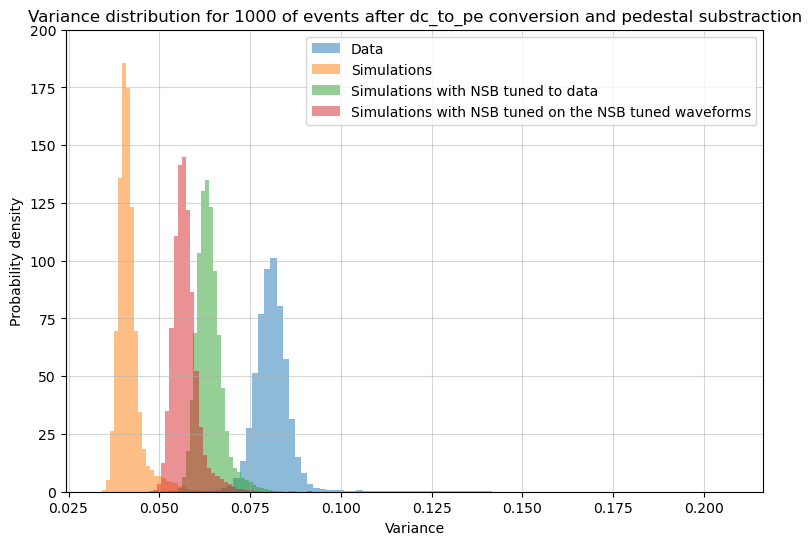

In [8]:
plt.figure(figsize=(9,6))
x,y,c = plt.hist(np.array(data_row_variances).flatten(), bins = 100, density=True, alpha = 0.5, label = 'Data')
x,y,c = plt.hist(np.array(sim_row_variances).flatten(), bins = 100, density=True, alpha = 0.5, label = 'Simulations')
x,y,c = plt.hist(np.array(tuned_sim_row_variances).flatten(), bins = 100, density=True, alpha = 0.5, label = 'Simulations with NSB tuned to data')
x,y,c = plt.hist(np.array(double_tuned_sim_row_variances).flatten(), bins = 100, density=True, alpha = 0.5, label = 'Simulations with NSB tuned on the NSB tuned waveforms')
plt.grid(alpha = 0.5)
plt.ylim(0,200)
plt.xlabel('Variance')
plt.ylabel('Probability density')
plt.title('Variance distribution for 1000 of events after dc_to_pe conversion and pedestal substraction')
plt.legend()
print(f"Mean value of the variance for data {round(np.mean(np.array(data_row_variances).flatten()),3)} with std = {round(np.std(np.array(data_row_variances).flatten()), 3)}")
print(f"Mean value of the variance for simulations {round(np.mean(np.array(sim_row_variances).flatten()),3)} with std = {round(np.std(np.array(sim_row_variances).flatten()),3)}")
print(f"Mean value of the variance for tuned simulations {round(np.mean(np.array(tuned_sim_row_variances).flatten()),3)} with std = {round(np.std(np.array(tuned_sim_row_variances).flatten()),3)}")
print(f"Mean value of the variance for tuned simulations on tuned simulations {round(np.mean(np.array(double_tuned_sim_row_variances).flatten()),3)} with std = {round(np.std(np.array(double_tuned_sim_row_variances).flatten()),3)}")
#plt.savefig('/Users/vdk/muons2024/images/PlanPaper/Variance_1000_events_cut<1.3pe_histogram.pdf', dpi = 200)

### Check how typical event looks like for tuned simulation

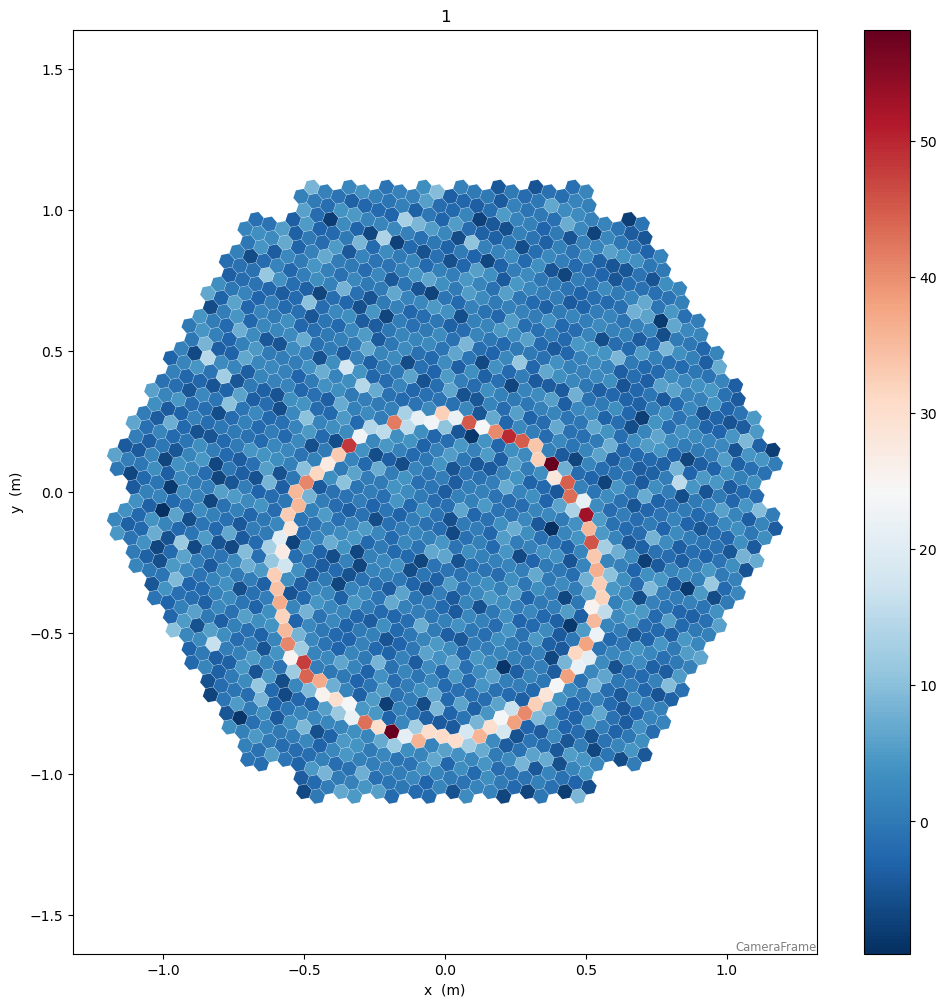

In [11]:
plt.figure(figsize = (12,12))
camgeom = source.subarray.tel[1].camera.geometry
disp = CameraDisplay(camgeom,title='1')
disp.image = tune_sim_waveforms[0].sum(axis=1)  
disp.cmap = plt.cm.RdBu_r
disp.add_colorbar()
disp.set_limits_percent(95)
plt.show()